In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.preprocessing import Normalizer


from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
color = sns.color_palette()
sns.set()

In [4]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
#data = data.drop(['Healthcare_1'], axis=1)
#test = test.drop(['Healthcare_1'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [7]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [8]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


## Приведение типов

Этажей как и квартир с дробным значением нет, поэтому можно поменять тип.  
Это положительно сказалось на модели

In [9]:
data['HouseFloor'] = data['HouseFloor'].astype(np.int64)
data['Rooms'] = data['Rooms'].astype(np.int64)

# Разделение даты на тренировочную и валидационную выборку

In [10]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

## Заполнение средними данными

In [22]:
train.loc[train['LifeSquare'].isnull(), 'LifeSquare'] = train['LifeSquare'].mean()
valid.loc[valid['LifeSquare'].isnull(), 'LifeSquare'] = train['LifeSquare'].mean()
test.loc[test['LifeSquare'].isnull(), 'LifeSquare'] = train['LifeSquare'].mean()

train.loc[train['Healthcare_1'].isnull(), 'Healthcare_1'] = train['Healthcare_1'].mean()
valid.loc[valid['Healthcare_1'].isnull(), 'Healthcare_1'] = train['Healthcare_1'].mean()
test.loc[test['Healthcare_1'].isnull(), 'Healthcare_1'] = train['Healthcare_1'].mean()

In [23]:
train = pd.get_dummies(train)
valid = pd.get_dummies(valid)
test = pd.get_dummies(test)

## Очистка тренировочных данных

In [28]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 6252 to 4705
Data columns (total 23 columns):
Id               3000 non-null int64
DistrictId       3000 non-null int64
Rooms            3000 non-null int64
Square           3000 non-null float64
LifeSquare       3000 non-null float64
KitchenSquare    3000 non-null float64
Floor            3000 non-null int64
HouseFloor       3000 non-null int64
HouseYear        3000 non-null int64
Ecology_1        3000 non-null float64
Social_1         3000 non-null int64
Social_2         3000 non-null int64
Social_3         3000 non-null int64
Healthcare_1     3000 non-null float64
Helthcare_2      3000 non-null int64
Shops_1          3000 non-null int64
Price            3000 non-null float64
Ecology_2_A      3000 non-null uint8
Ecology_2_B      3000 non-null uint8
Ecology_3_A      3000 non-null uint8
Ecology_3_B      3000 non-null uint8
Shops_2_A        3000 non-null uint8
Shops_2_B        3000 non-null uint8
dtypes: float64(6), int64(1

# Оценка полученных данных

In [30]:
fts =  [
'Rooms',
'Square',
'LifeSquare',
'KitchenSquare',
'Floor',
'HouseFloor',
'HouseYear',
'Ecology_1',
'Social_1',
'Social_2',
'Social_3',
'Healthcare_1',
'Helthcare_2',
'Shops_1',
'Ecology_2_A',
'Ecology_3_A',
'Shops_2_A',
       ]


In [31]:
lr = LinearRegression()
lr.fit(train.loc[:, fts], train['Price'])
lr_pred = lr.predict(train.loc[:, fts])
lr_r2_train = r2(train['Price'], lr_pred)

lr_pred_valid = lr.predict(valid.loc[:, fts])

lr_r2_valid = r2(valid['Price'], lr_pred_valid)

print(lr_r2_train, lr_r2_valid)

0.46832089097334806 0.43827031171912345


In [32]:
rf_r2_valid_max = 0
for i in range(1, 30, 2):
    rf = RF(n_estimators=250, max_depth=i, min_samples_leaf=1, random_state=100, n_jobs = -1)
    rf.fit(train.loc[:, fts], train['Price'])
    rf_pred = rf.predict(train.loc[:, fts])
    
    rf_r2_train = r2(train['Price'], rf_pred)
    rf_pred_valid = rf.predict(valid.loc[:, fts])
    
    rf_r2_valid = r2(valid['Price'], rf_pred_valid)
    if rf_r2_valid_max < rf_r2_valid:
        rf_r2_valid_max = rf_r2_valid
        rf_r2_train_max = rf_r2_train
        rf_i_max = i
print(rf_r2_train_max, rf_r2_valid_max, rf_i_max, '\n')

0.9566269073910216 0.7204159301988251 19 



Text(0, 0.5, 'Признак')

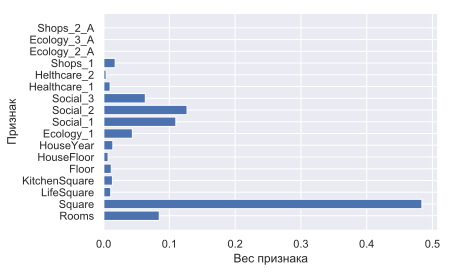

In [33]:
trf = RF(n_estimators=250, max_depth=19, min_samples_leaf=rf_i_max, random_state=100, n_jobs = -1)
trf.fit(train.loc[:, fts], train['Price'])
trf.feature_importances_
plt.barh(train.loc[:, fts].columns, trf.feature_importances_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [34]:
rf_r2_valid_max > 0.7215107892062286  

False

In [35]:
print('linar_regression \n', lr_r2_train, lr_r2_valid, '\n')
print('forest \n', rf_r2_train_max, rf_r2_valid_max, rf_i_max, '\n')
#print('KNN \n', knn_r2_train_max, knn_r2_valid_max, knn_i_max, '\n')

linar_regression 
 0.46832089097334806 0.43827031171912345 

forest 
 0.9566269073910216 0.7204159301988251 19 



Предсказание на тесте

In [36]:
pred_test = trf.predict(test.loc[:, fts])
pred_test.shape

(5000,)

In [37]:
test['Price'] = pred_test

In [38]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,1133.876167,0,0,0,1,0,1,0,1,164704.250612
1,15856,74,2.0,69.263183,37.523283,1.0,6,1.0,1977,0.075779,6,1437,3,1133.876167,0,2,0,1,0,1,0,1,185883.062785
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,30,7538,87,4702.000000,5,5,0,1,0,1,0,1,190810.493128
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,1133.876167,3,3,0,1,0,1,0,1,343143.622121
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,2,629,1,1133.876167,0,0,0,1,0,1,1,0,135517.722923


In [39]:
#test.loc[:, ['Id', 'Price']].to_csv('output/APetrov_predictions.csv', index=None)